## II. Simulation of white noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 30 # total time
dt_values = [1.0, 0.5, 0.1]

x_list = []
w_list = []
w_list_scaled=[]
t_list = []

# Simulation of a trajectory
for Dt in dt_values:
    N = int(T / Dt)
    t = np.linspace(0, T, N)
    w = np.random.normal(0, 1, N)
    x = np.zeros(N)
    w_scaled = w / np.sqrt(Dt)
    for i in range(1, N):
        x[i] = x[i-1] + np.sqrt(Dt) * w[i]
    
    t_list.append(t)
    x_list.append(x)
    w_list.append(w)
    w_list_scaled.append(w_scaled)

In [3]:
# Simulation of many trajectories for the average

n_traj = 10000  # number of trajectories for average

means = []
stds = []
for Dt in dt_values:
    N = int(T / Dt)
    x_all = np.zeros((n_traj, N))
    for j in range(n_traj):
        w = np.random.normal(0, 1, N)
        for i in range(1, N):
            x_all[j, i] = x_all[j, i-1] + np.sqrt(Dt) * w[i]
    mean = np.mean(x_all, axis=0)
    std = np.std(x_all, axis=0)
    means.append(mean)
    stds.append(std)

In [4]:
# Limits
ylim_w = max(np.max(np.abs(w)) for w in w_list_scaled)
ylim_x = max(np.max(np.abs(x)) for x in x_list + stds)

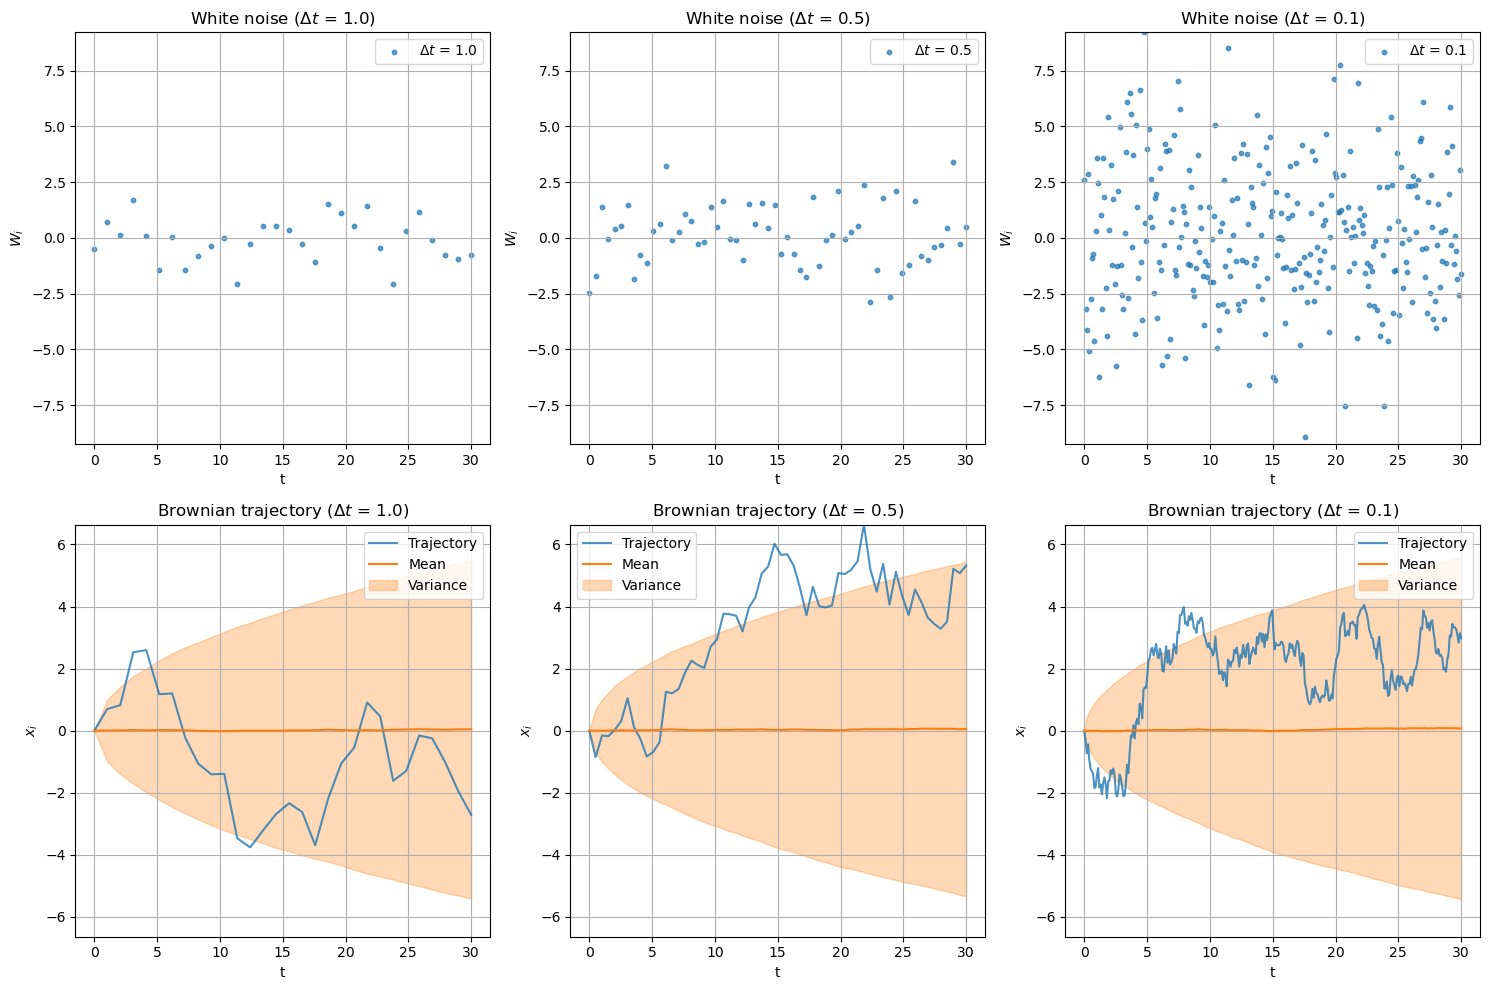

In [5]:
# Plot graphs
plt.figure(figsize=(15, 10))

for idx, Dt in enumerate(dt_values):
    t = t_list[idx]
    x = x_list[idx]
    w = w_list[idx]
    w_scaled = w_list_scaled[idx]
    mean = means[idx]
    std = stds[idx]

    # White noise graph
    plt.subplot(2, 3, idx + 1)
    plt.scatter(t, w_scaled, s=10, alpha=0.7, label=fr'$\Delta t$ = {Dt}')
    plt.xlabel('t')
    plt.ylabel(r'$W_i$')
    plt.ylim(-ylim_w, ylim_w)
    plt.grid(True)
    plt.title(fr'White noise ($\Delta t$ = {Dt})')
    plt.legend()

    # Brownian trajectories graph
    plt.subplot(2, 3, idx + 4)
    plt.plot(t, x, color='C0', alpha=0.8, label=fr'Trajectory')
    plt.plot(t, mean, color='C1', label='Mean')
    plt.fill_between(t, mean - std, mean + std, color='C1', alpha=0.3, label=r'Variance')
    plt.xlabel('t')
    plt.ylabel(r'$x_i$')
    plt.ylim(-ylim_x, ylim_x)
    plt.grid(True)
    plt.title(fr'Brownian trajectory ($\Delta t$ = {Dt})')
    plt.legend()

plt.tight_layout()
plt.show()